# Doggos vs Cattos

### Computer Vision

### Project: Build a binary k-Nearest Neighbor classifier that will classify pictures of dogs and cats.
_**Doggos vs Cattos**_ is a machine learning project focused on researching how diffrent learning algorithms perform in terms of classification RGB images and what kind of information can be mined using them.

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

### Load and explore dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dogs_vs_cats import data_utils

plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2

In [2]:
# Cleaning up variable to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

img_width = 64
img_height = 64
channels = 3

(X_train, y_train), (X_test, y_test) = data_utils.load_data(image_dim=(img_width, img_height))

print('Training data shape: ', X_train.shape)
print('Training label shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test label shape: ', y_test.shape)

Found 18000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Training data shape:  (18000, 64, 64, 3)
Training label shape:  (18000,)
Test data shape:  (5000, 64, 64, 3)
Test label shape:  (5000,)


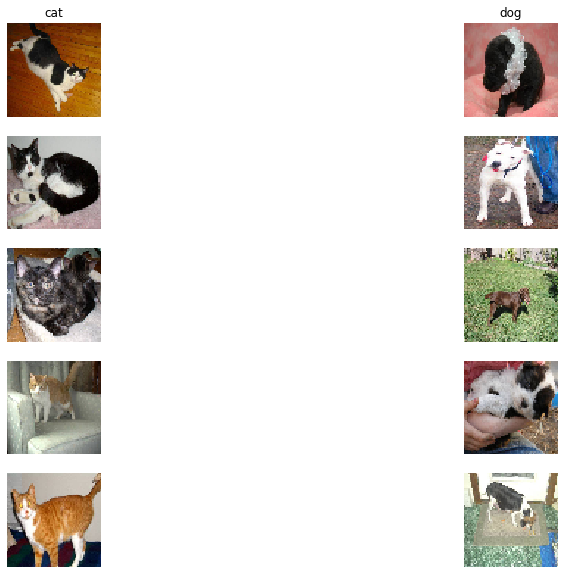

In [3]:
# Visualize some examples from a dataset
classes = ['cat', 'dog']
num_classes = len(classes)
samples_per_class = 5

figure = plt.figure(figsize=(15.0, 10.0))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

### k-Nearest Neighbors model

In [4]:
# Subsample the data for more efficient code execution
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 12288) (500, 12288)


In [5]:
# Performing Grid Search to find best kNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh_params = [
    {'n_neighbors': (1, 3, 5, 8)}
]

grid_search = GridSearchCV(estimator=KNeighborsClassifier(weights='distance', algorithm='brute'), 
                           param_grid=neigh_params, 
                           cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': (1, 3, 5, 8)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
best_knn = grid_search.best_estimator_

print('Best kNN classifier obtain has following parameters')
best_knn

Best kNN classifier obtain has following parameters


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

### Evaluating best kNN classifier

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = best_knn.predict(X_test)
print('Confusion matrix\n', confusion_matrix(y_test, y_pred))
print('\nClassification report\n', classification_report(y_test, y_pred))

Confusion matrix
 [[167  67]
 [163 103]]

Classification report
               precision    recall  f1-score   support

         0.0       0.51      0.71      0.59       234
         1.0       0.61      0.39      0.47       266

    accuracy                           0.54       500
   macro avg       0.56      0.55      0.53       500
weighted avg       0.56      0.54      0.53       500



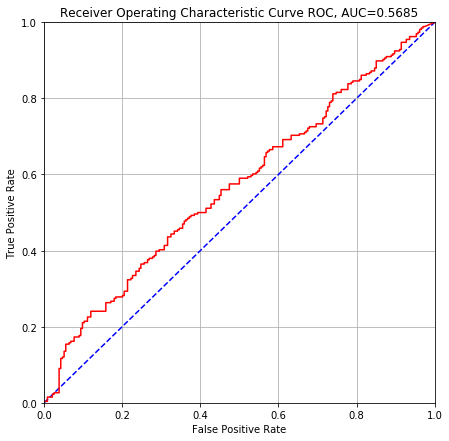

In [8]:
from dogs_vs_cats import data_vis

y_score = best_knn.predict_proba(X_test)
data_vis.plot_roc_curve(y_test, y_score[:, 1])